In [343]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from numpy.linalg import norm, inv

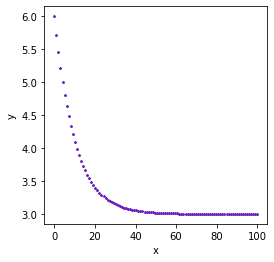

3.0 3.0 -0.11
[6.         5.71177171 5.45123526 5.21573014 5.00285144 4.81042529
 4.63648669 4.47925944 4.33713796 4.20867096 4.09254657 3.98757896
 3.89269623 3.80692946 3.72940283 3.65932465 3.59597931 3.53871994
 3.48696183 3.44017644 3.39788601 3.35965867 3.32510407 3.29386934
 3.26563552 3.2401143  3.21704505 3.19619221 3.17734283 3.16030442
 3.144903   3.13098128 3.11839711 3.10702198 3.09673973 3.08744535
 3.07904394 3.07144971 3.0645851  3.05838002 3.05277109 3.04770105
 3.04311812 3.0389755  3.03523089 3.03184604 3.0287864  3.02602071
 3.02352074 3.02126096 3.01921829 3.01737187 3.01570285 3.01419418
 3.01283046 3.01159776 3.01048349 3.00947628 3.00856584 3.00774286
 3.00699896 3.00632653 3.0057187  3.00516927 3.00467263 3.0042237
 3.0038179  3.00345109 3.00311952 3.00281981 3.0025489  3.00230401
 3.00208265 3.00188256 3.00170169 3.0015382  3.00139041 3.00125683
 3.00113608 3.00102693 3.00092826 3.00083908 3.00075846 3.00068559
 3.00061972 3.00056018 3.00050636 3.00045771 3.00

In [605]:
def func(xi, c1, c2, c3):
    return c1 + c2*e**(c3*x)
N = 100
yi = func(xi, c1, c2, c3)
c_0 = np.array([3, 3, -0.11])
c1 = c_0[0]
c2 = c_0[1]
c3 = c_0[2]

xi = np.linspace(0, N, N)

plt.figure(figsize=(4,4))
plt.scatter(x, yi, s = 5, c = "#6c25be", marker = "*")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print(c1, c2, c3)
print(yi)

In [606]:
def computeDf( c , xi ):
    Df = np.zeros( ( N, len(c) ) )
    Df[:, 0] = 1
    Df[:, 1] = e**(c3*xi)
    Df[:, 2] = xi*c2*e**(c3*xi)
    return Df

In [607]:
def GaussNewton(c0, xi, yi):
    maxIter = 1000
    tol = 0.01
    Df = computeDf( c_0, xi )
    f = func(xi, *c_0.T)
    res = yi - f
    i = 1
    c= c_0
    while(norm(Df.T @ res) > tol and i < maxIter):
        c = c + ( ( inv(Df.T @ Df) ) @  Df.T @ (np.subtract( yi, f ) ) ) 
        Df = computeDf( c , xi )
        f = func(xi, *c.T)
        res = yi - f
        i += 1
    return c, i, res
c, i, res = GaussNewton(c_0, xi, yi)
print( 'parameters found:', c )
print( "\nNumber of iterations done", i )
print("Residuals:", res)

parameters found: [ 2.99999689  3.00001532 -0.10000163]

Number of iterations done 5
Residuals: [-1.22105252e-05 -6.26630473e-06 -1.32290297e-06  2.75712142e-06
  6.09403826e-06  8.79297665e-06  1.09457242e-05  1.26323204e-05
  1.39224662e-05  1.48767727e-05  1.55478634e-05  1.59813505e-05
  1.62166955e-05  1.62879709e-05  1.62245309e-05  1.60516034e-05
  1.57908127e-05  1.54606381e-05  1.50768193e-05  1.46527121e-05
  1.41996008e-05  1.37269737e-05  1.32427633e-05  1.27535581e-05
  1.22647874e-05  1.17808836e-05  1.13054231e-05  1.08412504e-05
  1.03905852e-05  9.95511687e-06  9.53608512e-06  9.13435133e-06
  8.75045962e-06  8.38468988e-06  8.03710352e-06  7.70758286e-06
  7.39586500e-06  7.10157079e-06  6.82422961e-06  6.56330043e-06
  6.31818969e-06  6.08826639e-06  5.87287477e-06  5.67134489e-06
  5.48300138e-06  5.30717071e-06  5.14318705e-06  4.99039699e-06
  4.84816335e-06  4.71586803e-06  4.59291427e-06  4.47872825e-06
  4.37276017e-06  4.27448495e-06  4.18340253e-06  4.0990379

[[6.09089151 5.71370361 5.46712667 5.23701749 5.07206743 4.82224244
  4.71689744 4.48577704 4.4271564  4.22674256 4.09472773 4.07834687
  3.93992306 3.82546648 3.75951984 3.67141782 3.6580398  3.61791313
  3.57736939 3.49935148 3.46727365 3.36682589 3.34522896 3.3151998
  3.33475158 3.28269315 3.27918718 3.20562212 3.26913826 3.18283432
  3.23150035 3.21952273 3.16678586 3.14443381 3.18652502 3.14363889
  3.11232276 3.13314642 3.11375177 3.15468058 3.06933851 3.10409602
  3.09588721 3.06835773 3.08521909 3.11910897 3.10578629 3.09447978
  3.05664504 3.08614414 3.08742411 3.10504345 3.04317161 3.02796317
  3.01532135 3.04041784 3.10462664 3.08465981 3.08485949 3.04163352
  3.07447903 3.08422012 3.05235361 3.02941455 3.04937698 3.05394602
  3.04902289 3.02741286 3.09619447 3.0297737  3.04872473 3.02372725
  3.09341968 3.06353    3.0947204  3.03270717 3.1000117  3.04053515
  3.05820322 3.0069585  3.08278426 3.01482825 3.0048002  3.01359044
  3.00581056 3.02652838 3.06926123 3.05661445 3.0

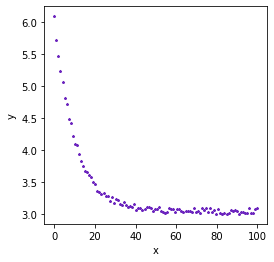

In [581]:
noise = [0.1*np.random.rand(N)]
yiNew = (yi + noise)
print(yiNew)
plt.figure(figsize=(4,4))
plt.scatter(xi, yiNew, s = 5, c = "#6c25be", marker = "*")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [608]:
def computeDf( c , xi ):
    Df = np.zeros( ( N, len(c) ) )
    Df[:, 0] = 1
    Df[:, 1] = e**(c3*xi)
    Df[:, 2] = xi*c2*e**(c3*xi)
    return Df

    def GaussNewton(c0, xi, yiNew):
        maxIter = 1000
        tol = 0.01
        Df = computeDf( c_0, xi )
        f = func(xi, *c_0.T)
        res = yiNew - f
        i = 1
        c= c_0
        while(norm(Df.T @ res) > tol and i < maxIter):
            c = c + ( ( inv(Df.T @ Df) ) @ ( Df.T @ (np.subtract( yiNew, f ) ) ) )
            Df = computeDf( c , xi )
            f = func(xi, *c.T)
            res = yiNew - f
            i += 1
        return c, i, res
print( 'parameters found:', c )
print( "\nNumber of iterations done", i )
print("Residuals:", res)

parameters found: [ 2.99999689  3.00001532 -0.10000163]

Number of iterations done 5
Residuals: [-1.22105252e-05 -6.26630473e-06 -1.32290297e-06  2.75712142e-06
  6.09403826e-06  8.79297665e-06  1.09457242e-05  1.26323204e-05
  1.39224662e-05  1.48767727e-05  1.55478634e-05  1.59813505e-05
  1.62166955e-05  1.62879709e-05  1.62245309e-05  1.60516034e-05
  1.57908127e-05  1.54606381e-05  1.50768193e-05  1.46527121e-05
  1.41996008e-05  1.37269737e-05  1.32427633e-05  1.27535581e-05
  1.22647874e-05  1.17808836e-05  1.13054231e-05  1.08412504e-05
  1.03905852e-05  9.95511687e-06  9.53608512e-06  9.13435133e-06
  8.75045962e-06  8.38468988e-06  8.03710352e-06  7.70758286e-06
  7.39586500e-06  7.10157079e-06  6.82422961e-06  6.56330043e-06
  6.31818969e-06  6.08826639e-06  5.87287477e-06  5.67134489e-06
  5.48300138e-06  5.30717071e-06  5.14318705e-06  4.99039699e-06
  4.84816335e-06  4.71586803e-06  4.59291427e-06  4.47872825e-06
  4.37276017e-06  4.27448495e-06  4.18340253e-06  4.0990379

Paragraph on my findings changing N and the noise:

I ran the code around 15 times, changing N's size and the amount of noise on yi. I've noticed that increasing these values had an impact on the number of iterations it took to reach the ideal parameters. Namely that increasing N decreased the amount of iterations needed, and increasing the noise increased the number of iterations needed. The opposite is also true (i.e. that decreasing N and decreasing noise had the opposite affect as what is described above.) I also noticed that when the noise becomes disruptive enough, the 




